In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

epl_test = pd.read_excel('EPL_Testing.xlsx')
epl_train = pd.read_excel('EPL_Training.xlsx')

x=epl_train.drop(columns=['HomeTeam','AwayTeam','FTR'])
y=epl_train['FTR']

m = epl_test.drop(columns=['HomeTeam','AwayTeam','FTR'])
n = epl_test['FTR']

In [2]:
from sklearn.neighbors import KNeighborsClassifier

Dict1 = {1: 0,2: 0,3: 0,4: 0,5: 0,6: 0,7: 0,8: 0,9: 0,10: 0}

errors=0

k=10



for i in range (1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.05)
    a=y_test.reset_index(drop=True)
    for j in range(1,10+1):
        errors=0
        model = KNeighborsClassifier(n_neighbors=j)
        model.fit(x_train,y_train)
        predictions=model.predict(x_test)
        for i in range(0,len(y_test)):
            if predictions[i]!=a[i]:
                errors+=1
        Dict1[j]+=errors
        

In [3]:
#print(Dict1)
average={1:Dict1[1]/1000,2:Dict1[2]/1000,3:Dict1[3]/1000,4:Dict1[4]/1000,5:Dict1[5]/1000,6:Dict1[6]/1000,7:Dict1[7]/1000,8:Dict1[8]/1000,9:Dict1[9]/1000,10:Dict1[10]/1000,}
#print(average)
minimum_k = min(average, key=average.get)
print(minimum_k)

7


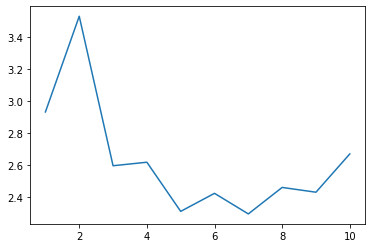

In [4]:
import matplotlib.pylab as plt

lists = sorted(average.items())

w,z = zip(*lists)

plt.plot(w,z)
plt.show()

In [5]:
correct=0
model2 = KNeighborsClassifier(n_neighbors=minimum_k)
model2.fit(x,y)
predictions2=model2.predict(m)
for i in range(0,len(n)):
    if predictions2[i]==n[i]:
        correct+=1
accuracy = (correct / len(n)) * 100
print(f"The classification accuracy is = {accuracy} %")

The classification accuracy is = 62.295081967213115 %
